# 1 Degradations dans une image

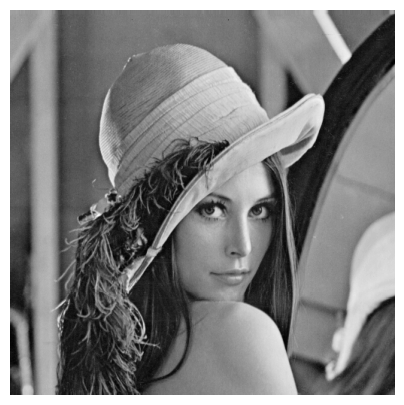

In [6]:
from skimage import data, color
import matplotlib.pyplot as plt
import cv2 as cv2
path = "Lena.png" 
img = cv2.imread(path,0)

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


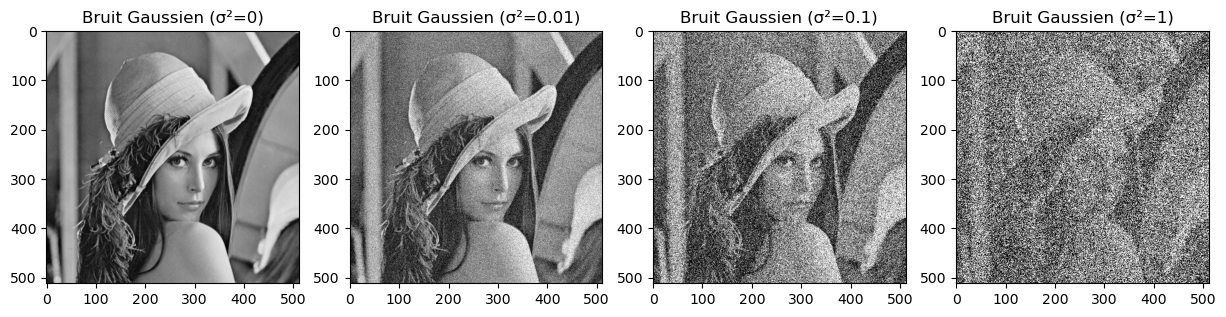

In [7]:
from skimage.util import random_noise

variances = [0,0.01, 0.1, 1]
i=1
plt.figure(figsize=(15, 7))

for sigma_squared in variances:
    imGauss = random_noise(img, mode='gaussian', var=sigma_squared)
    plt.subplot(1, 4, i)
    plt.imshow(imGauss, cmap='gray')
    plt.title(f"Bruit Gaussien (σ²={sigma_squared})")
    i+=1


Le bruit gaussien est ajouté avec des variances différentes : 0, 0.01, 0.1 et 1. À mesure que la variance augmente, le bruit devient plus intense, rendant l'image de plus en plus floue . Avec une variance de 1, l'image est presque complètement masquée par le bruit, perdant la majorité des détails.

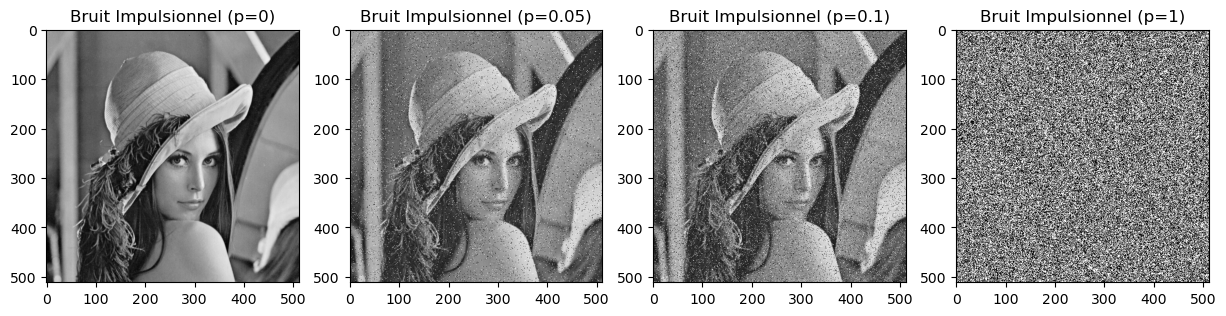

In [8]:
p = [0,0.05, 0.1, 1]
i=1
plt.figure(figsize=(15, 7))

for p in p:
    imSP = random_noise(img, mode='s&p', amount=p)
    plt.subplot(1, 4, i)
    plt.imshow(imSP, cmap='gray')
    plt.title(f"Bruit Impulsionnel (p={p})")
    i+=1


Le bruit impulsionnel montre également différents niveaux d'intensité . À p=0, l'image est propre sans bruit. À p=0.05, on observe des pixels isolés noirs et blancs. En augmentant p à 0.1, le nombre de pixels affectés augmente, perturbant l'image. À p=1, l'image est entièrement composée de bruit, rendant l'original complètement méconnaissable.

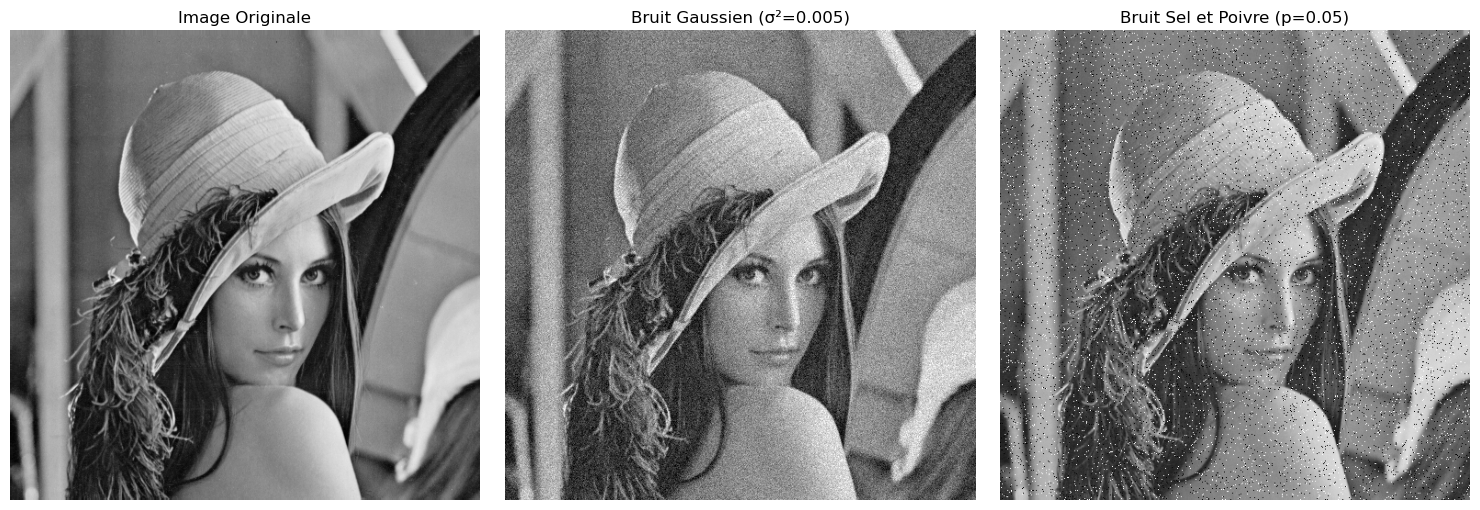

In [9]:
from skimage.util import random_noise
import numpy as np
sigma_square = 0.005
imGauss = random_noise(img, mode='gaussian', var=sigma_square)
imGauss = (imGauss * 255).astype(np.uint8)

p = 0.05
imSP = random_noise(img, mode='s&p', amount=p)
imSP = (imSP * 255).astype(np.uint8)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Image Originale")
axes[0].axis('off')

axes[1].imshow(imGauss, cmap='gray')
axes[1].set_title(f"Bruit Gaussien (σ²={sigma_square})")
axes[1].axis('off')

axes[2].imshow(imSP, cmap='gray')
axes[2].set_title(f"Bruit Sel et Poivre (p={p})")
axes[2].axis('off')

plt.tight_layout()
plt.show()


Bruit Gaussien: L'image montre un léger flou qui réduit le contraste et la clarté des détails fins. Le bruit gaussien introduit une variation aléatoire distribuée autour de chaque pixel, ce qui entraîne une perte de netteté et de précision dans l'image.Le bruit gaussien est répandu de manière uniforme (un bruit additif) affectant tous les pixels sur toute l'image et affecte la clarté de l'image dans son ensemble.

Bruit Sel et Poivre: l'image a des pixels isolés qui sont soit très sombres (poivre), soit très clairs (sel). Même à un faible niveau (p=0.05), l'effet est notable et perturbe plus fortement l'aspect visuel de l'image que le bruit gaussien du fait de son intensité contrastée.
Le bruit sel et poivre est beaucoup plus sporadique et disruptif mais est concentré sur des pixels spécifiques.

# 2 Filtrage spatial d’une image

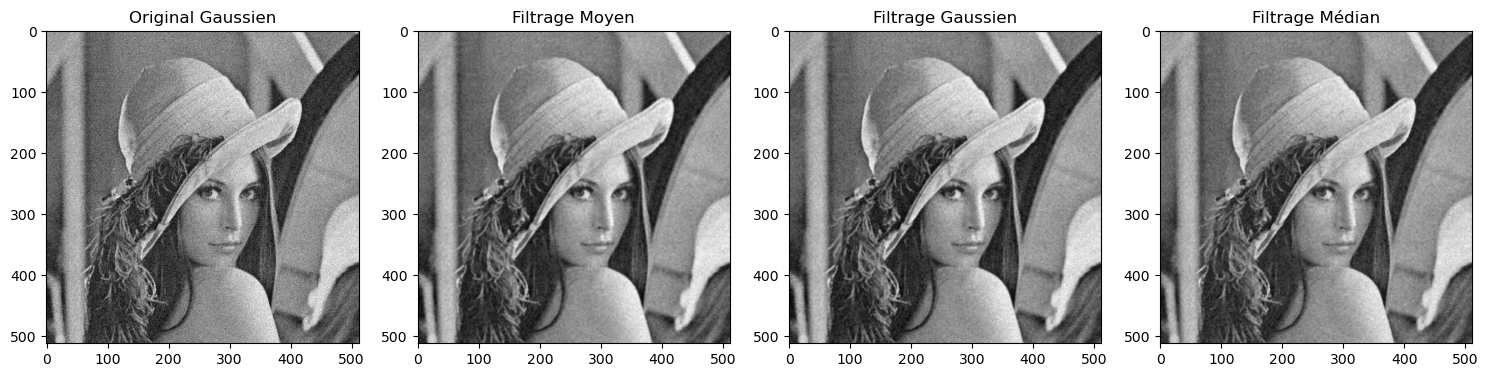

Résultats pour le Filtrage Moyen:
MSE: 44.333309173583984
PSNR: 31.663502112922618
------------------------------------
Résultats pour le Filtrage Gaussien:
MSE: 46.74662780761719
PSNR: 31.43330073517474
------------------------------------
Résultats pour le Filtrage Médian:
MSE: 52.42410659790039
PSNR: 30.935493228351177


In [12]:
ksize = (3, 3)
imGaussblur = cv2.blur(imGauss, ksize)
blur = cv2.GaussianBlur(imGauss, ksize, 0)
median = cv2.medianBlur(imGauss, 3)

plt.figure(figsize=(15, 7))

plt.subplot(1, 4, 1)
plt.imshow(imGauss, cmap='gray')
plt.title("Original Gaussien")

plt.subplot(1, 4, 2)
plt.imshow(imGaussblur, cmap='gray')
plt.title("Filtrage Moyen")

plt.subplot(1, 4, 3)
plt.imshow(blur, cmap='gray')
plt.title("Filtrage Gaussien")

plt.subplot(1, 4, 4)
plt.imshow(median, cmap='gray')
plt.title("Filtrage Médian")

plt.tight_layout()
plt.show()
mse_imGaussblur = calculate_mse(img, imGaussblur)
psnr_imGaussblur = calculate_psnr(mse_imGaussblur)

mse_blur = calculate_mse(img, blur)
psnr_blur = calculate_psnr(mse_blur)

mse_median = calculate_mse(img, median)
psnr_median = calculate_psnr(mse_median)

# Afficher les résultats
print("Résultats pour le Filtrage Moyen:")
print("MSE:", mse_imGaussblur)
print("PSNR:", psnr_imGaussblur)
print("------------------------------------")
print("Résultats pour le Filtrage Gaussien:")
print("MSE:", mse_blur)
print("PSNR:", psnr_blur)
print("------------------------------------")
print("Résultats pour le Filtrage Médian:")
print("MSE:", mse_median)
print("PSNR:", psnr_median)

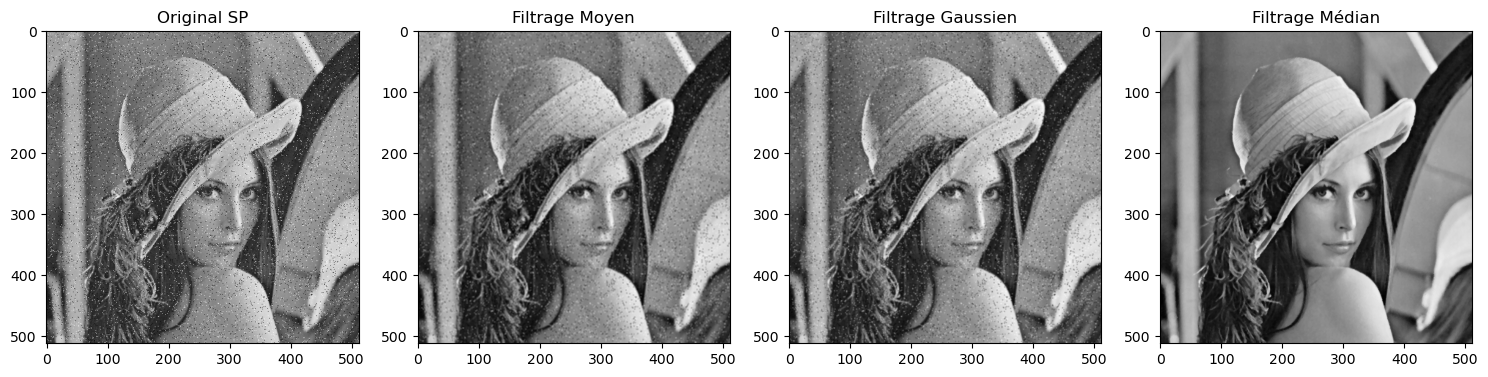

Résultats pour le Filtrage Moyen:
MSE: 47.80451965332031
PSNR: 31.336114021699046
------------------------------------
Résultats pour le Filtrage Gaussien:
MSE: 42.590965270996094
PSNR: 31.837628779409883
------------------------------------
Résultats pour le Filtrage Médian:
MSE: 13.380992889404297
PSNR: 36.865920209494874


In [14]:
ksize = (3, 3)
imSPblur = cv2.blur(imSP, ksize)
blur1 = cv2.GaussianBlur(imSP, ksize, 0)
median1 = cv2.medianBlur(imSP, 3)

plt.figure(figsize=(15, 7))

plt.subplot(1, 4, 1)
plt.imshow(imSP, cmap='gray')
plt.title("Original SP")

plt.subplot(1, 4, 2)
plt.imshow(imSPblur, cmap='gray')
plt.title("Filtrage Moyen")

plt.subplot(1, 4, 3)
plt.imshow(blur1, cmap='gray')
plt.title("Filtrage Gaussien")

plt.subplot(1, 4, 4)
plt.imshow(median1, cmap='gray')
plt.title("Filtrage Médian")

plt.tight_layout()
plt.show()
mse_imSPblur = calculate_mse(img, imSPblur)
psnr_imSPblur = calculate_psnr(mse_imSPblur)

mse_blur1 = calculate_mse(img, blur1)
psnr_blur1 = calculate_psnr(mse_blur1)

mse_median1 = calculate_mse(img, median1)
psnr_median1 = calculate_psnr(mse_median1)

# Afficher les résultats
print("Résultats pour le Filtrage Moyen:")
print("MSE:", mse_imSPblur)
print("PSNR:", psnr_imSPblur)
print("------------------------------------")
print("Résultats pour le Filtrage Gaussien:")
print("MSE:", mse_blur1)
print("PSNR:", psnr_blur1)
print("------------------------------------")
print("Résultats pour le Filtrage Médian:")
print("MSE:", mse_median1)
print("PSNR:", psnr_median1)

Filtrage Moyen: Ce filtre lisse l'image en moyennant les valeurs des pixels avec leurs voisins. On voit que le bruit est atténué, mais le flou résultant peut également estomper les détails fins.

Filtrage Gaussien:cette méthode accorde plus de poids aux pixels voisins en fonction de leur proximité avec le pixel cible, créant un effet de lissage qui préserve mieux les détails que le filtrage moyen.

Le filtrage moyen et gaussien semblent avoir des performances similaires pour le bruit gaussien avec un peu plus de performance pour le filtrage gaussien, ce qui est également attendu, car ce type de filtrage est spécifiquement conçu pour atténuer le bruit qui suit une distribution gaussienne.

Filtrage Médian: C'est un filtre non linéaire qui remplace chaque pixel par la médiane des pixels voisins. C'est souvent le plus efficace contre le bruit sel et poivre(bruit impulsionnel) car il peut éliminer les pixels extrêmes sans flouter autant l'image. 

In [11]:
def calculate_mse(image_orig, image_eq):
    N, M = image_orig.shape
    mse = np.sum((image_orig - image_eq) ** 2) / (N * M)
    return mse

def calculate_psnr(mse, max_val=255):
    psnr = 10 * np.log10((max_val ** 2) / mse)
    return psnr

def calculate_sd(image_eq):
    sd = np.std(image_eq)
    return sd

moyen
----------------------------------
mse 83.64620208740234
psnr 28.906341340384593
----------------------------------
mse 86.18878173828125
psnr 28.77629618781213
----------------------------------
mse 87.47434997558594
psnr 28.711996369557788
----------------------------------
----------------------------------
gaussian
mse 81.15787506103516
psnr 29.03749693395563
----------------------------------
mse 85.33848571777344
psnr 28.819354285814317
----------------------------------
mse 86.00080871582031
psnr 28.785778256805425
----------------------------------


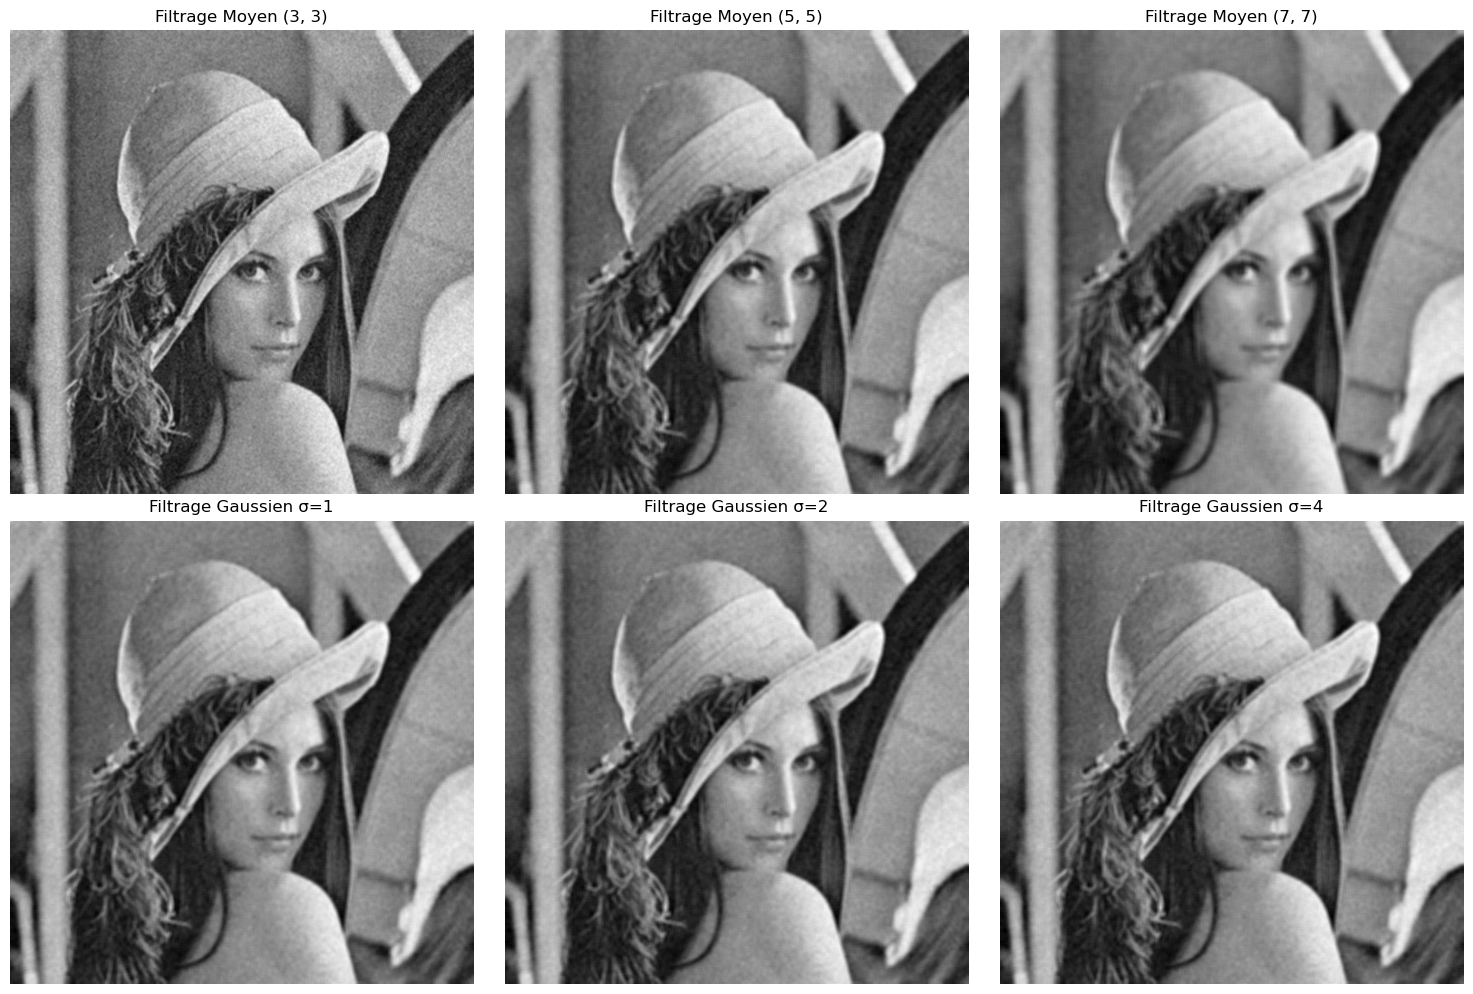

In [56]:
ksize_mean = [(3, 3), (5, 5), (7, 7)]
mean_filtered_images = [cv2.blur(imGauss, ks) for ks in ksize_mean]

sigma_values = [1, 2, 4]
gaussian_filtered_images = [cv2.GaussianBlur(imGauss, (5, 5), sigmaX) for sigmaX in sigma_values]

plt.figure(figsize=(15, 10))

print( 'moyen')
print( '----------------------------------')

for i, imgi in enumerate(mean_filtered_images, 1):
    mse = calculate_mse(imGauss, imgi)
    psnr = calculate_psnr(mse)
    print('mse', mse)
    print('psnr', psnr)
    print( '----------------------------------')


    plt.subplot(2, len(ksize_mean), i)
    plt.imshow(imgi, cmap='gray')
    plt.title(f"Filtrage Moyen {ksize_mean[i-1]}")
    plt.axis('off')

  

print( '----------------------------------')
print( 'gaussian')
    
for i, imgi in enumerate(gaussian_filtered_images, 1):
    mse = calculate_mse(imGauss, imgi)
    psnr = calculate_psnr(mse)
    print('mse', mse)
    print('psnr', psnr)
    print( '----------------------------------')

    
    plt.subplot(2, len(sigma_values), len(ksize_mean) + i)
    plt.imshow(img, cmap='gray')
    plt.title(f"Filtrage Gaussien σ={sigma_values[i-1]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Filtrage Moyen : On observe que l'augmentation de la taille du noyau (3x3, 5x5, 7x7) lors du filtrage moyen augmente la quantité de lissage. Cela se traduit par une réduction progressive du bruit, mais aussi par une perte de netteté dans les détails de l'image. Les valeurs de MSE et PSNR montrent une amélioration de la qualité de l'image filtrée par rapport à l'image bruitée, mais il est important de trouver un équilibre entre la réduction du bruit et la préservation des détails.

Filtrage Gaussien : Les différentes valeurs d'écart-type semblent avoir un impact significatif sur la performance du filtrage. Un écart-type plus petit maintient plus de détails, mais un écart-type plus grand réduit davantage le bruit au prix d'un flou supplémentaire.
Les mesures quantitatives (MSE et PSNR) fournissent une indication de la qualité de la restauration.Un MSE plus bas et un PSNR plus élevé indiquent une meilleure restauration. Cependant, ces mesures doivent être équilibrées avec la qualité perçue de l'image, car une image trop lisse pourrait ne pas être souhaitable malgré de meilleures valeurs de MSE et PSNR.

In [46]:
mse = calculate_mse(img, imGauss)
psnr = calculate_psnr(mse)

print("MSE:", mse)
print("PSNR:", psnr)

MSE: 86.00080871582031
PSNR: 28.785778256805425


In [49]:
mse = calculate_mse(img, imSP)
psnr = calculate_psnr(mse)

print("MSE:", mse)
print("PSNR:", psnr)

MSE: 40.09203338623047
PSNR: 32.10022277527719


# 3 Methodes à base de patch : moyenne non locale

l'article présente la méthode de débruitage d'image appelée "Non-Local Means". Cette méthode repose sur le principe de remplacer la couleur d'un pixel par la moyenne des couleurs de pixels similaires, sans que ces pixels similaires soient nécessairement proches les uns des autres. L'algorithme tire parti de la redondance qui existe dans la plupart des images, où des zones similaires peuvent être éloignées spatialement.

L'algorithme NL-Means fonctionne en comparant les patchs, ou petites régions autour d'un pixel, et en moyennant les couleurs des pixels ayant des patchs semblables, où la pondération est inversement proportionnelle à la différence entre les patchs. Cela permet de préserver les contours et les détails tout en réduisant le bruit.

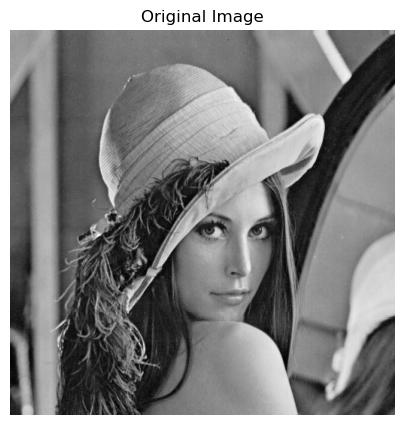

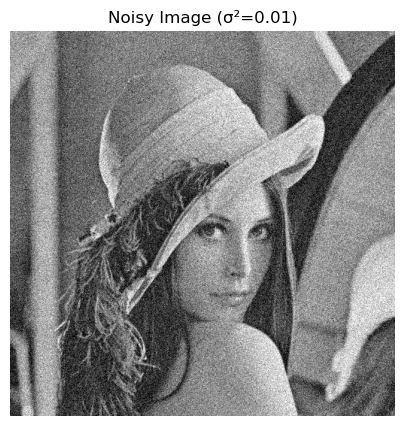

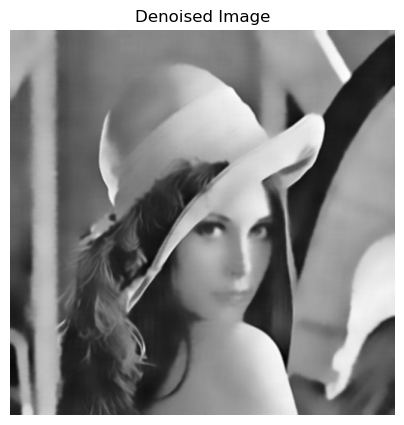

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.util import random_noise
import cv2
from skimage.restoration import estimate_sigma
def nlmeans(image, t, f, h):
    M, N = image.shape
    pad_width = t + f
    padded_image = np.pad(image, pad_width, mode='reflect')
    denoised_image = np.zeros(image.shape)

    for x in range(M):
        for y in range(N):
            i = x + pad_width
            j = y + pad_width
            P = padded_image[i-f:i+f+1, j-f:j+f+1]

            weights = np.zeros((2*t+1, 2*t+1))

            for k in range(-t, t+1):
                for l in range(-t, t+1):
                    if k == 0 and l == 0:
                        continue
                    Q = padded_image[i-f+k:i+f+1+k, j-f+l:j+f+1+l]
                    dist2 = np.sum((P - Q) ** 2)
                    weights[k+t, l+t] = np.exp(-max(dist2 - 2 * (h**2), 0))

            weights /= np.sum(weights)
            denoised_image[x, y] = np.sum(padded_image[i-t:i+t+1, j-t:j+t+1] * weights)

    return denoised_image

# Load the original image
path = "Lena.png" 
img = cv2.imread(path,0)

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("Original Image")
plt.show()

# Generate the noisy image with Gaussian noise
sigma_squared = 0.01  # Variance of the Gaussian noise
imGauss = random_noise(img, mode='gaussian', var=sigma_squared)
# Display the noisy image
plt.figure(figsize=(5, 5))
plt.imshow(imGauss, cmap='gray')
plt.axis('off')
plt.title(f"Noisy Image (σ²={sigma_squared})")
plt.show()
# Estimer le niveau de bruit de l'image bruitée
sigma_est = np.mean(estimate_sigma(imGauss))
# Parameters for NLMeans
t = 10  # Size of the search window
f = 3   # Size of the patches
h = 1.15 * sigma_est  # Filtering parameter

# Apply the NLMeans filter
denoised_img = nlmeans(imGauss, t, f, h)

# Display the denoised image
plt.figure(figsize=(5, 5))
plt.imshow(denoised_img, cmap='gray')
plt.axis('off')
plt.title("Denoised Image")
plt.show()



# Analyser l'influence des paramètres

Les paramètres principaux à considérer sont :

h : La force de filtrage qui détermine l'influence du poids des pixels. Une valeur plus élevée de h entraînera un lissage plus important, mais pourra aussi entraîner une perte de détails.

patch_size : La taille des patchs utilisés pour le débruitage. Des patchs plus grands peuvent lisser l'image mais également supprimer des détails fins.

patch_distance : La distance maximale pour rechercher des patchs similaires pour le débruitage. Une plus grande distance de recherche peut améliorer le débruitage en trouvant plus de patchs similaires, mais augmente le temps de calcul.

In [13]:
# Estimer le niveau de bruit de l'image bruitée
sigma_est = np.mean(estimate_sigma(imGauss))
# Définir les plages pour chaque paramètre
h_values = [0.5 * sigma_est , 0.8 * sigma_est, 1.0* sigma_est]
patch_sizes = [5, 7, 9]
patch_distances = [11, 13, 17]

# Espace de stockage pour les résultats
results = []

# Analyser l'influence des paramètres
for h in h_values:
    for patch_size in patch_sizes:
        for patch_distance in patch_distances:
            # Appliquer le débruitage NLMeans
            denoised_img = nlmeans(imGauss, patch_distance, patch_size, h)
            # Calculer les métriques de qualité
            mse = calculate_mse(img, denoised_img)
            psnr = calculate_psnr(mse)
            results.append((h_value, patch_size, patch_distance, mse, psnr))


for h_value, patch_size, patch_distance, mse, psnr in results:
    print(f"h: {h_value}, Patch Size: {patch_size}, Patch Distance: {patch_distance}, MSE: {mse}, PSNR: {psnr}")




C:\Users\fnaic\AppData\Local\Temp\ipykernel_32576\492676633.py:29: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights)


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
from skimage import io
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio


# Appliquer NLMeans denoising
nlmeans_denoised_img  = nlmeans(imGauss, t, f, h)
# Appliquer les filtres linéaire et non-linéaire
kernel_size = (3, 3)
linear_blur = cv2.blur(imGauss , kernel_size)
gaussian_blur = cv2.GaussianBlur(imGauss, kernel_size, 0)
median_blur = cv2.medianBlur(cv2.convertScaleAbs(imGauss), 3)

# Calculer les valeurs MSE et PSNR pour chaque image
mse_nlmeans = calculate_mse(img, nlmeans_denoised_img)
psnr_nlmeans = calculate_psnr(mse_nlmeans)

mse_linear_blur = calculate_mse(img, linear_blur)
psnr_linear_blur = calculate_psnr(mse_linear_blur)

mse_gaussian_blur = calculate_mse(img, gaussian_blur)
psnr_gaussian_blur =calculate_psnr(mse_gaussian_blur)

mse_median_blur = calculate_mse(img, median_blur)
psnr_median_blur = calculate_psnr(mse_median_blur)

# Afficher les résultats
print("Résultats de débruitage NLMeans :")
print("MSE:", mse_nlmeans)
print("PSNR:", psnr_nlmeans)
print("------------------------------------")
print("Résultats du filtrage linéaire (moyen) :")
print("MSE:", mse_linear_blur)
print("PSNR:", psnr_linear_blur)
print("------------------------------------")
print("Résultats du filtrage linéaire (gaussien) :")
print("MSE:", mse_gaussian_blur)
print("PSNR:", psnr_gaussian_blur)
print("------------------------------------")
print("Résultats du filtrage non-linéaire (médian) :")
print("MSE:", mse_median_blur)
print("PSNR:", psnr_median_blur)
